In [1]:
import geopandas as gpd

<AxesSubplot:>

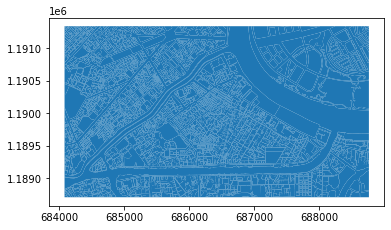

In [2]:
s0_lu=gpd.read_file('../Data/GIS/Scenario0/Landuse_scenario_0/LandUse_0.shp')
s0_lu.plot()

# Calculate Suitable Table Dimensions

In [3]:
s0_lu.crs

<Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
table_bounds=s0_lu.total_bounds
table_corners=s0_lu.unary_union.envelope.exterior.coords
for c in table_corners:
    print(c)

(684080.7193, 1188709.8915999997)
(688760.7193999998, 1188709.8915999997)
(688760.7193999998, 1191339.8915999997)
(684080.7193, 1191339.8915999997)
(684080.7193, 1188709.8915999997)


In [5]:
table_width=table_bounds[2]-table_bounds[0]
table_height=table_bounds[3]-table_bounds[1]
print(table_width)
print(table_height)
print(table_width/table_height)

4680.00009999983
2630.0
1.779467718631114


In [6]:
import math

In [7]:
math.gcd(int(table_width), int(table_height))

10

Maximum integer valued cell size to fit these table dimensions is 10

In [8]:
ratio=int(table_width)/ int(table_height)
print(ratio)

1.779467680608365


In [9]:
for c in range(60,80):
    print('{}, {}, {}'.format(c, table_width/c, table_height/c))

60, 78.00000166666383, 43.833333333333336
61, 76.72131311475131, 43.114754098360656
62, 75.48387258064243, 42.41935483870968
63, 74.28571587301317, 41.74603174603175
64, 73.12500156249735, 41.09375
65, 72.00000153845893, 40.46153846153846
66, 70.90909242423984, 39.84848484848485
67, 69.8507477611915, 39.25373134328358
68, 68.82353088235044, 38.6764705882353
69, 67.82608840579464, 38.11594202898551
70, 66.85714428571185, 37.57142857142857
71, 65.91549436619479, 37.04225352112676
72, 65.00000138888653, 36.52777777777778
73, 64.10959041095657, 36.02739726027397
74, 63.2432445945923, 35.54054054054054
75, 62.40000133333107, 35.06666666666667
76, 61.57894868420829, 34.60526315789474
77, 60.77922207791987, 34.15584415584416
78, 60.000001282049105, 33.717948717948715
79, 59.240507594934556, 33.29113924050633


With cell size of 36, there would be 130 columns and 73.05 rows

# Find angle of Rotation

In [10]:
table_corners_gdf=gpd.GeoDataFrame(index=range(len(table_corners)), crs=s0_lu.crs, 
                                   geometry=gpd.points_from_xy([c[0] for c in table_corners],
                                                              [c[1] for c in table_corners]))

In [11]:
table_corners_wgs=table_corners_gdf.to_crs('EPSG:4326')
table_corners_wgs['n']=[str(i) for i in table_corners_wgs.index]

<AxesSubplot:>

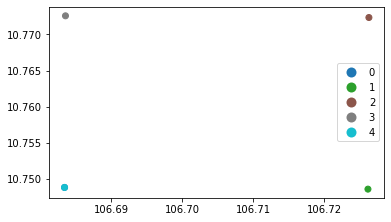

In [12]:
table_corners_wgs.plot(column='n', legend=True)

In [13]:
top_left=table_corners_wgs.loc[3].geometry.coords
print(top_left[0])

(106.68353996851717, 10.772585487816258)


In [14]:
top_right=table_corners_wgs.loc[2].geometry.coords
print(top_right[0])

(106.72632834690373, 10.772350109683384)


In [15]:
slope=((top_right[0][1]-top_left[0][1])/(top_right[0][0]-top_left[0][0]))
slope

-0.005500982784340772

In [16]:
def deg_to_rad(deg):
    return deg*math.pi/180

def rad_to_deg(rad):
    return rad*180/math.pi

In [17]:
angle = rad_to_deg(math.atan(slope))
angle

-0.3151799175424706